In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os

In [4]:
health_centers = pd.read_excel(os.path.join("..","Data","Original_Files","HRSAData","Data_Explorer_Dataset_v2.xlsx"))
health_centers

,Site Name,Services Delivered at Site,Health Center Type,Health Center Location Type,Health Center Location Setting,County,State,FIPS,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Operational Schedule Description
0,White House Clinic - Irvine,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Estill County,KY,21065,N,Y,N,N,N,N,Rural,Full-Time
1,La Clinica School-Based Health Center at Phoen...,Yes,Service Delivery Site,Seasonal,School,Jackson County,OR,41029,Y,Y,N,Y,Y,N,Urban,Full-Time
2,South Side School,Yes,Service Delivery Site,Seasonal,School,Hartford County,CT,09003,N,Y,N,N,N,N,Unknown,Unknown
3,CHC/SEK Southeast High School,Yes,Service Delivery Site,Seasonal,School,Crawford County,KS,20037,N,Y,N,N,N,N,Unknown,Unknown
4,Cornerstone Family Healthcare: The Center for ...,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Orange County,NY,36071,N,Y,N,Y,Y,N,Urban,Full-Time
5,Administrative Offices,No,Administrative,Permanent,Unknown,Pierce County,WA,53053,N,Y,N,N,N,N,Unknown,Unknown
6,Ofu Community Health Center,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Western District,AS,60050,N,Y,N,N,N,N,Unknown,Unknown
7,ARcare - 45,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Jackson County,AR,05067,Y,Y,N,Y,N,N,Unknown,Unknown
8,Third Street Primary Care Clinic,Yes,Service Delivery Site,Permanent,All Other Clinic Types,New York County,NY,36061,N,Y,N,N,Y,N,Urban,Unknown
9,RIVER VALLEY PRIMARY CARE SERVICES INC.,Yes,Administrative/Service Delivery Site,Permanent,All Other Clinic Types,Logan County,AR,05083,N,Y,N,N,N,N,Rural,Full-Time


In [7]:
health_centers_id = health_centers.assign(id=(health_centers['Site Name'] + '_' + health_centers['FIPS']).astype('category').cat.codes)
health_centers_id.head()

,Site Name,Services Delivered at Site,Health Center Type,Health Center Location Type,Health Center Location Setting,County,State,FIPS,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Operational Schedule Description,id
0,White House Clinic - Irvine,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Estill County,KY,21065,N,Y,N,N,N,N,Rural,Full-Time,13365
1,La Clinica School-Based Health Center at Phoen...,Yes,Service Delivery Site,Seasonal,School,Jackson County,OR,41029,Y,Y,N,Y,Y,N,Urban,Full-Time,7229
2,South Side School,Yes,Service Delivery Site,Seasonal,School,Hartford County,CT,09003,N,Y,N,N,N,N,Unknown,Unknown,11565
3,CHC/SEK Southeast High School,Yes,Service Delivery Site,Seasonal,School,Crawford County,KS,20037,N,Y,N,N,N,N,Unknown,Unknown,1791
4,Cornerstone Family Healthcare: The Center for ...,Yes,Service Delivery Site,Permanent,All Other Clinic Types,Orange County,NY,36071,N,Y,N,Y,Y,N,Urban,Full-Time,3368


In [17]:
# cols_to_move = ['id','Health_Center_Name','City','State','Abr','County','Year','Health_Outcomes_Rank']
centers_with_county_ranks = centers_with_county_ranks[ cols_to_move + [ col for col in centers_with_county_ranks.columns if col not in cols_to_move ] ]
centers_with_county_ranks

,id,Health_Center_Name,City,State,Abr,County,Year,Health_Outcomes_Rank,Total_Patients,Children,...,Cervical_Cancer_Screening,Adolescent_Weight_Screening_and_Follow Up,Adult_Weight_Screening_and_Follow Up,Colorectal_Cancer_Screening,Childhood_Immunization,Appropriate_Asthma_Treatment_Plan,Cholesterol_Treatment_Lipid_Therapy_CAD,Heart_Attack_Stroke_Treatment_Aspirin_IVD,Blood_Pressure_Control,Total_Cost_per_Patient
0,19,ALASKA ISLAND COMMUNITY SERVICES,WRANGELL,Alaska,AK,Wrangell-Petersburg,2016,8,3062,0.217832,...,0.232061,0.214286,0.293086,0.111487,0.277778,0.977778,0.775000,0.873874,0.676000,2215.0270
1,24,ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS,ANCHORAGE,Alaska,AK,Anchorage,2016,13,458,0.233624,...,0.557143,0.000000,0.050562,1.000000,1.000000,1.000000,1.000000,0.230769,0.746032,7786.9740
2,37,ANCHORAGE NEIGHBORHOOD HEALTH CENTER,ANCHORAGE,Alaska,AK,Anchorage,2016,13,13184,0.124393,...,0.388001,0.500000,0.264292,0.240799,0.341667,0.942857,0.811159,0.728571,0.571288,1236.5980
3,94,BETHEL FAMILY CLINIC,BETHEL,Alaska,AK,Bethel,2016,19,3792,0.667721,...,0.112219,0.001717,0.749554,0.007160,0.361111,0.875000,0.818182,0.750000,0.616000,715.4225
4,114,BRISTOL BAY AREA HEALTH CORPORATION,DILLINGHAM,Alaska,AK,Dillingham,2016,23,5649,0.322535,...,0.497992,0.019776,0.311701,0.509917,0.317073,1.000000,0.422535,0.587786,0.514664,1903.0150
5,115,BRISTOL BAY BOROUGH,NAKNEK,Alaska,AK,Bristol Bay,2016,15,1374,0.107715,...,0.128571,0.371429,0.242857,0.185714,0.400000,1.000000,1.000000,1.000000,0.666667,1535.0990
6,351,COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT,FORT YUKON,Alaska,AK,Yukon-Koyukuk,2016,21,1157,0.308557,...,0.491228,0.113514,0.414516,0.797101,0.785714,0.000000,0.375000,0.548387,0.542945,4108.9670
7,367,CROSS ROAD MEDICAL CENTER,GLENNALLEN,Alaska,AK,Valdez-Cordova,2016,3,2908,0.277510,...,0.106667,0.061633,0.345909,0.132336,0.173913,0.466667,0.638889,0.742857,0.565553,1504.9630
8,417,"EASTERN ALEUTIAN TRIBES, INC",ANCHORAGE,Alaska,AK,Anchorage,2016,13,2227,0.180961,...,0.271429,0.228571,0.657143,0.328571,0.500000,0.615385,0.842105,0.894737,0.381271,4879.4930
9,524,GIRDWOOD HEALTH CLINIC,GIRDWOOD,Alaska,AK,Anchorage,2016,13,974,0.197125,...,0.143411,0.129032,0.466019,0.143911,0.400000,1.000000,0.666667,1.000000,0.584615,964.5359


In [3]:
all_county_ranks = pd.read_csv(os.path.join("..","Data","Cleaned_Files","All_Years_County_Health_Ranking_Data.csv"))[['County/Borough/Parish','Year','Health_Outcomes_Rank']]
all_county_ranks

C:\Users\steph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,County/Borough/Parish,Year,Health_Outcomes_Rank
0,0,2020,0
1,Autauga,2020,6.0
2,Baldwin,2020,2.0
3,Barbour,2020,45.0
4,Bibb,2020,34.0
5,Blount,2020,24.0
6,Bullock,2020,56.0
7,Butler,2020,64.0
8,Calhoun,2020,42.0
9,Chambers,2020,44.0


In [4]:
health_centers_county_rank = pd.merge(health_centers, all_county_ranks,  how='left', left_on=['County','Year'], right_on = ['County/Borough/Parish','Year'])
health_centers_county_rank

,Health_Center_Name,City,State,County,Year,Abr,Total_Patients,Children,Adults_under_65,Older_Adults,...,Adult_Weight_Screening_and_Follow Up,Colorectal_Cancer_Screening,Childhood_Immunization,Appropriate_Asthma_Treatment_Plan,Cholesterol_Treatment_Lipid_Therapy_CAD,Heart_Attack_Stroke_Treatment_Aspirin_IVD,Blood_Pressure_Control,Total_Cost_per_Patient,County/Borough/Parish,Health_Outcomes_Rank
0,ALASKA ISLAND COMMUNITY SERVICES,WRANGELL,Alaska,Wrangell-Petersburg,2016,AK,3062,0.217832,0.618877,0.163292,...,0.293086,0.111487,0.277778,0.977778,0.775000,0.873874,0.676000,2215.0270,Wrangell-Petersburg,8
1,ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS,ANCHORAGE,Alaska,Anchorage,2016,AK,458,0.233624,0.648472,0.117904,...,0.050562,1.000000,1.000000,1.000000,1.000000,0.230769,0.746032,7786.9740,Anchorage,13
2,ANCHORAGE NEIGHBORHOOD HEALTH CENTER,ANCHORAGE,Alaska,Anchorage,2016,AK,13184,0.124393,0.702897,0.172709,...,0.264292,0.240799,0.341667,0.942857,0.811159,0.728571,0.571288,1236.5980,Anchorage,13
3,BETHEL FAMILY CLINIC,BETHEL,Alaska,Bethel,2016,AK,3792,0.667721,0.307753,0.024525,...,0.749554,0.007160,0.361111,0.875000,0.818182,0.750000,0.616000,715.4225,Bethel,19
4,BRISTOL BAY AREA HEALTH CORPORATION,DILLINGHAM,Alaska,Dillingham,2016,AK,5649,0.322535,0.593025,0.084440,...,0.311701,0.509917,0.317073,1.000000,0.422535,0.587786,0.514664,1903.0150,Dillingham,23
5,BRISTOL BAY BOROUGH,NAKNEK,Alaska,Bristol Bay,2016,AK,1374,0.107715,0.826055,0.066230,...,0.242857,0.185714,0.400000,1.000000,1.000000,1.000000,0.666667,1535.0990,Bristol Bay,15
6,COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT,FORT YUKON,Alaska,Yukon-Koyukuk,2016,AK,1157,0.308557,0.583405,0.108038,...,0.414516,0.797101,0.785714,0.000000,0.375000,0.548387,0.542945,4108.9670,Yukon-Koyukuk,21
7,CROSS ROAD MEDICAL CENTER,GLENNALLEN,Alaska,Valdez-Cordova,2016,AK,2908,0.277510,0.557084,0.165406,...,0.345909,0.132336,0.173913,0.466667,0.638889,0.742857,0.565553,1504.9630,Valdez-Cordova,3
8,"EASTERN ALEUTIAN TRIBES, INC",ANCHORAGE,Alaska,Anchorage,2016,AK,2227,0.180961,0.725191,0.093848,...,0.657143,0.328571,0.500000,0.615385,0.842105,0.894737,0.381271,4879.4930,Anchorage,13
9,GIRDWOOD HEALTH CLINIC,GIRDWOOD,Alaska,Anchorage,2016,AK,974,0.197125,0.664271,0.138604,...,0.466019,0.143911,0.400000,1.000000,0.666667,1.000000,0.584615,964.5359,Anchorage,13


In [5]:
health_centers_county_rank.loc[health_centers_county_rank.isnull().any(axis=1)]

,Health_Center_Name,City,State,County,Year,Abr,Total_Patients,Children,Adults_under_65,Older_Adults,...,Adult_Weight_Screening_and_Follow Up,Colorectal_Cancer_Screening,Childhood_Immunization,Appropriate_Asthma_Treatment_Plan,Cholesterol_Treatment_Lipid_Therapy_CAD,Heart_Attack_Stroke_Treatment_Aspirin_IVD,Blood_Pressure_Control,Total_Cost_per_Patient,County/Borough/Parish,Health_Outcomes_Rank
17060,MUNICIPALITY OF SKAGWAY,SKAGWAY,Alaska,Skagway,2017,AK,1629,0.132597,0.721301,0.146102,...,0.402715,0.04086,0.125,0.666667,1.0,0.944444,0.586735,1747.705,NaN,NaN


In [13]:
health_centers_county_rank = health_centers_county_rank.dropna()
health_centers_county_rank

,Health_Center_Name,City,State,County,Year,Abr,Total_Patients,Children,Adults_under_65,Older_Adults,...,Adult_Weight_Screening_and_Follow Up,Colorectal_Cancer_Screening,Childhood_Immunization,Appropriate_Asthma_Treatment_Plan,Cholesterol_Treatment_Lipid_Therapy_CAD,Heart_Attack_Stroke_Treatment_Aspirin_IVD,Blood_Pressure_Control,Total_Cost_per_Patient,County/Borough/Parish,Health_Outcomes_Rank
0,ALASKA ISLAND COMMUNITY SERVICES,WRANGELL,Alaska,Wrangell-Petersburg,2016,AK,3062,0.217832,0.618877,0.163292,...,0.293086,0.111487,0.277778,0.977778,0.775000,0.873874,0.676000,2215.0270,Wrangell-Petersburg,8
1,ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS,ANCHORAGE,Alaska,Anchorage,2016,AK,458,0.233624,0.648472,0.117904,...,0.050562,1.000000,1.000000,1.000000,1.000000,0.230769,0.746032,7786.9740,Anchorage,13
2,ANCHORAGE NEIGHBORHOOD HEALTH CENTER,ANCHORAGE,Alaska,Anchorage,2016,AK,13184,0.124393,0.702897,0.172709,...,0.264292,0.240799,0.341667,0.942857,0.811159,0.728571,0.571288,1236.5980,Anchorage,13
3,BETHEL FAMILY CLINIC,BETHEL,Alaska,Bethel,2016,AK,3792,0.667721,0.307753,0.024525,...,0.749554,0.007160,0.361111,0.875000,0.818182,0.750000,0.616000,715.4225,Bethel,19
4,BRISTOL BAY AREA HEALTH CORPORATION,DILLINGHAM,Alaska,Dillingham,2016,AK,5649,0.322535,0.593025,0.084440,...,0.311701,0.509917,0.317073,1.000000,0.422535,0.587786,0.514664,1903.0150,Dillingham,23
5,BRISTOL BAY BOROUGH,NAKNEK,Alaska,Bristol Bay,2016,AK,1374,0.107715,0.826055,0.066230,...,0.242857,0.185714,0.400000,1.000000,1.000000,1.000000,0.666667,1535.0990,Bristol Bay,15
6,COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT,FORT YUKON,Alaska,Yukon-Koyukuk,2016,AK,1157,0.308557,0.583405,0.108038,...,0.414516,0.797101,0.785714,0.000000,0.375000,0.548387,0.542945,4108.9670,Yukon-Koyukuk,21
7,CROSS ROAD MEDICAL CENTER,GLENNALLEN,Alaska,Valdez-Cordova,2016,AK,2908,0.277510,0.557084,0.165406,...,0.345909,0.132336,0.173913,0.466667,0.638889,0.742857,0.565553,1504.9630,Valdez-Cordova,3
8,"EASTERN ALEUTIAN TRIBES, INC",ANCHORAGE,Alaska,Anchorage,2016,AK,2227,0.180961,0.725191,0.093848,...,0.657143,0.328571,0.500000,0.615385,0.842105,0.894737,0.381271,4879.4930,Anchorage,13
9,GIRDWOOD HEALTH CLINIC,GIRDWOOD,Alaska,Anchorage,2016,AK,974,0.197125,0.664271,0.138604,...,0.466019,0.143911,0.400000,1.000000,0.666667,1.000000,0.584615,964.5359,Anchorage,13


In [14]:
centers_with_county_ranks = health_centers_county_rank[(health_centers_county_rank.Health_Outcomes_Rank != 'NR')]
centers_with_county_ranks

,Health_Center_Name,City,State,County,Year,Abr,Total_Patients,Children,Adults_under_65,Older_Adults,...,Adult_Weight_Screening_and_Follow Up,Colorectal_Cancer_Screening,Childhood_Immunization,Appropriate_Asthma_Treatment_Plan,Cholesterol_Treatment_Lipid_Therapy_CAD,Heart_Attack_Stroke_Treatment_Aspirin_IVD,Blood_Pressure_Control,Total_Cost_per_Patient,County/Borough/Parish,Health_Outcomes_Rank
0,ALASKA ISLAND COMMUNITY SERVICES,WRANGELL,Alaska,Wrangell-Petersburg,2016,AK,3062,0.217832,0.618877,0.163292,...,0.293086,0.111487,0.277778,0.977778,0.775000,0.873874,0.676000,2215.0270,Wrangell-Petersburg,8
1,ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS,ANCHORAGE,Alaska,Anchorage,2016,AK,458,0.233624,0.648472,0.117904,...,0.050562,1.000000,1.000000,1.000000,1.000000,0.230769,0.746032,7786.9740,Anchorage,13
2,ANCHORAGE NEIGHBORHOOD HEALTH CENTER,ANCHORAGE,Alaska,Anchorage,2016,AK,13184,0.124393,0.702897,0.172709,...,0.264292,0.240799,0.341667,0.942857,0.811159,0.728571,0.571288,1236.5980,Anchorage,13
3,BETHEL FAMILY CLINIC,BETHEL,Alaska,Bethel,2016,AK,3792,0.667721,0.307753,0.024525,...,0.749554,0.007160,0.361111,0.875000,0.818182,0.750000,0.616000,715.4225,Bethel,19
4,BRISTOL BAY AREA HEALTH CORPORATION,DILLINGHAM,Alaska,Dillingham,2016,AK,5649,0.322535,0.593025,0.084440,...,0.311701,0.509917,0.317073,1.000000,0.422535,0.587786,0.514664,1903.0150,Dillingham,23
5,BRISTOL BAY BOROUGH,NAKNEK,Alaska,Bristol Bay,2016,AK,1374,0.107715,0.826055,0.066230,...,0.242857,0.185714,0.400000,1.000000,1.000000,1.000000,0.666667,1535.0990,Bristol Bay,15
6,COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT,FORT YUKON,Alaska,Yukon-Koyukuk,2016,AK,1157,0.308557,0.583405,0.108038,...,0.414516,0.797101,0.785714,0.000000,0.375000,0.548387,0.542945,4108.9670,Yukon-Koyukuk,21
7,CROSS ROAD MEDICAL CENTER,GLENNALLEN,Alaska,Valdez-Cordova,2016,AK,2908,0.277510,0.557084,0.165406,...,0.345909,0.132336,0.173913,0.466667,0.638889,0.742857,0.565553,1504.9630,Valdez-Cordova,3
8,"EASTERN ALEUTIAN TRIBES, INC",ANCHORAGE,Alaska,Anchorage,2016,AK,2227,0.180961,0.725191,0.093848,...,0.657143,0.328571,0.500000,0.615385,0.842105,0.894737,0.381271,4879.4930,Anchorage,13
9,GIRDWOOD HEALTH CLINIC,GIRDWOOD,Alaska,Anchorage,2016,AK,974,0.197125,0.664271,0.138604,...,0.466019,0.143911,0.400000,1.000000,0.666667,1.000000,0.584615,964.5359,Anchorage,13


In [16]:
list(centers_with_county_ranks.columns.values)

['Health_Center_Name',
 'City',
 'State',
 'County',
 'Year',
 'Abr',
 'Total_Patients',
 'Children',
 'Adults_under_65',
 'Older_Adults',
 'Racial_Ethnic_Minority',
 'Hispanic_Latino_Ethnicity',
 'African_American',
 'Asian',
 'American_Indian_Alaskan_Native',
 'Native_Hawaiian_Other_Pacific_Islander',
 'More_than_one_race',
 'Best_Served_in_another_language',
 'Patients_at_or_below_200Pct_Poverty',
 'Patients_at_or_below_100Pct_Poverty',
 'Uninsured',
 'Medicaid_CHIP',
 'Medicare',
 'Other_Third_Party',
 'Medical_Services',
 'Dental_Services',
 'Mental_Health_Services',
 'Substance_Abuse_Services',
 'Vision_Services',
 'Enabling_Services',
 'Pct_Pts_with_Hypertension',
 'Pct_Pts_with_Diabetes',
 'Pct_Pts_with_Asthma',
 'Pct_Pts_with_HIV',
 'Prenatal_Patients',
 'Prenatal_Patients_who_delivered',
 'Acces_to_Prenatal_Care',
 'Pct_Births_with_Low_Birth_Weight',
 'Cervical_Cancer_Screening',
 'Adolescent_Weight_Screening_and_Follow Up',
 'Adult_Weight_Screening_and_Follow Up',
 'Colorect

In [70]:
X = centers_with_county_ranks[['id',
                               'Year',
                               'Total_Patients',
                               'Older_Adults',
                               'Racial_Ethnic_Minority',
                               'Best_Served_in_another_language',
                               'Patients_at_or_below_100Pct_Poverty',
                               'Uninsured',
                               'Medicaid_CHIP',
                               'Medicare',
                               'Medical_Services',
                               'Mental_Health_Services', 
                               'Substance_Abuse_Services',
                               'Pct_Pts_with_Hypertension',
                               'Pct_Pts_with_Diabetes',
                               'Pct_Pts_with_Asthma',
                               'Pct_Pts_with_HIV',
                               'Pct_Births_with_Low_Birth_Weight',
                               'Total_Cost_per_Patient']]
y = centers_with_county_ranks[['Health_Outcomes_Rank']].values.reshape(-1,1)
print(X.shape, y.shape)

(44386, 19) (44386, 1)


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [82]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [83]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predictions = model.predict(X_test_scaled)

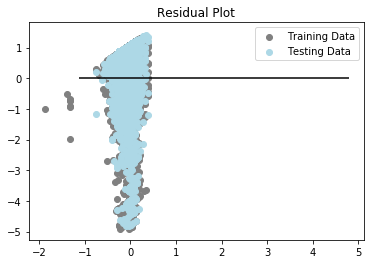

In [86]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="gray", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightblue", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9973423774818737, R2: 0.01438971987741289


In [88]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9973423787314711, R2: 0.014389718642514926


In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0003252029529255, R2: 0.011441982455984046


In [90]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01, l1_ratio=0.001).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9973865321452545, R2: 0.014346084621229991
